
# Loss function for a classification tree


1.  Mis-classification error
2.  Gini index
3.  Cross-entropy





In [45]:
import numpy as np
import matplotlib.pyplot as plt

# p_vec = np.linspace(0.0, 1.0, num=500)
# mis_cl_error_vec = np.minimum(1-p_vec, p_vec)
# gini_vec = 2*np.multiply(p_vec, 1-p_vec)
# #p_vec = p_vec[1:-1]
# cross_entropy_vec = -np.multiply(p_vec, np.log(p_vec))- np.multiply(1-p_vec, np.log(1-p_vec))
# plt.plot(p_vec, mis_cl_error_vec, '-')
# plt.plot(p_vec, gini_vec, '-')
# plt.plot(p_vec, cross_entropy_vec)
# plt.legend(['Mis-classification error', 'Gini index', 'Cross entropy'] )
# plt.xlabel('p')
# plt.grid('off')
# plt.savefig('LossFuncTree.png')

# Numerical Example on Wine Data
## Decision Tree 

In [46]:
from sklearn.datasets import load_wine
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
# load wine data
wine = load_wine()  
# Create a dataframe with the four feature variables
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# View the top 5 rows
display(df.head()) ################

############   remove the 3rd and 4th fields from the database
# wine.data = wine.data.T[:-1].T
# wine.feature_names = wine.feature_names[:-1]

max_depth = 3   # 2

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.33, random_state=42)

clf_dt = DecisionTreeClassifier( max_depth = max_depth, criterion = 'gini', random_state=0)
clf_dt = clf_dt.fit(X_train, y_train) 
y_test_est = clf_dt.predict(X_test)

cross_val_score(clf_dt, wine.data, wine.target, cv=10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


array([0.88888889, 0.88888889, 0.72222222, 0.88888889, 0.83333333,
       0.88888889, 0.83333333, 0.94444444, 0.94117647, 1.        ])

In [47]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [48]:
# !pip install graphviz
import graphviz
from graphviz import Graph
from sklearn import tree
dot_data = tree.export_graphviz(clf_dt, out_file=None, 
                     feature_names=wine.feature_names,  
                      class_names=wine.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  

graph.render("max_depth_wine") #################  saved to laptop download folder


'max_depth_wine.pdf'

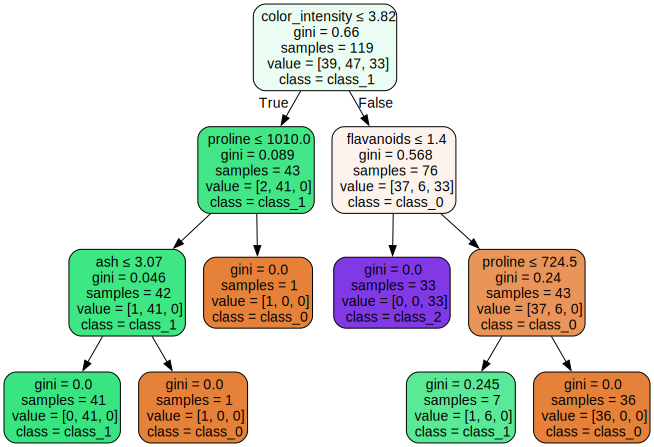

In [49]:
graph

In [50]:
import os
print( os.getcwd() )
# from google.colab import files
# files.download( "/content/max_depth_wine.pdf" ) #############  create a pdf file on you laptop in the download folder

c:\Users\Big_Guppy\Documents\Rutgers\628 Machine Learning\Week 4


In [51]:
# Create confusion matrix
pd.crosstab(y_test, y_test_est, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,0,1,2
Actual Species,,,
0,19,1,0
1,0,24,0
2,0,1,14


Confusion matrix, without normalization
[[19  1  0]
 [ 0 24  0]
 [ 0  1 14]]
Normalized confusion matrix
[[0.95       0.05       0.        ]
 [0.         1.         0.        ]
 [0.         0.06666667 0.93333333]]


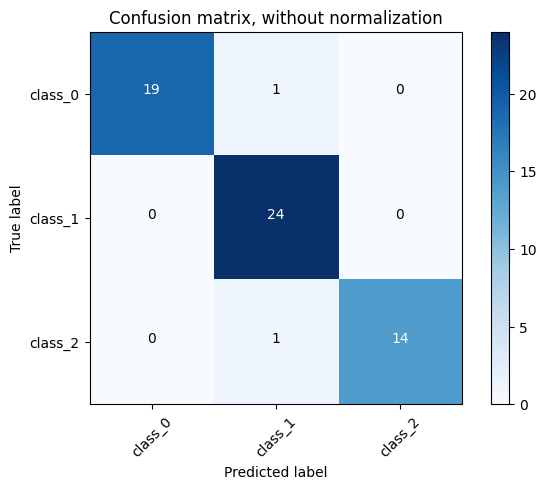

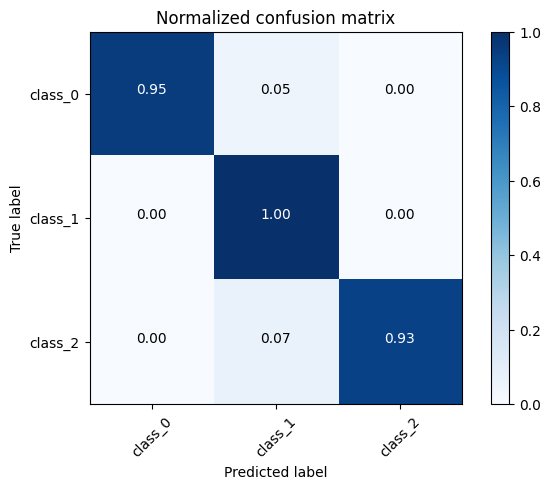

In [52]:
import itertools  
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)

## The code for the function plot_confusion_matrix() is attributed to http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

# Plot non-normalized confusion matrix
from sklearn.metrics import confusion_matrix
cm =  confusion_matrix(y_test, y_test_est)
plt.figure()
plot_confusion_matrix(cm, classes= wine.target_names, title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cm, classes= wine.target_names, normalize=True, title='Normalized confusion matrix')

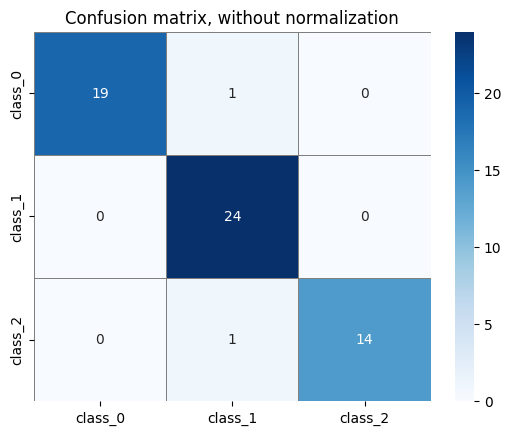

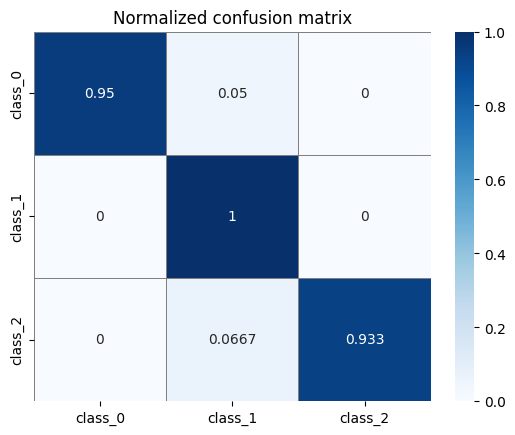

In [53]:
################
import seaborn as sns

cm_df = pd.DataFrame(cm, index=wine.target_names, columns=wine.target_names)
sns.heatmap(cm_df, annot=True, fmt='0.3G', linewidths=.5, cmap="Blues", linecolor='gray')
plt.title('Confusion matrix, without normalization')
plt.show()

cm_normalized = pd.DataFrame(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], index=wine.target_names, columns=wine.target_names)
sns.heatmap(cm_normalized, annot=True, fmt='0.3G', linewidths=.5, cmap="Blues", linecolor='gray')
plt.title('Normalized confusion matrix')
plt.show()

In [54]:
# View the importance scores
print(list(zip(wine.feature_names, clf_dt.feature_importances_)))

[('alcohol', 0.0), ('malic_acid', 0.0), ('ash', 0.025424965346173476), ('alcalinity_of_ash', 0.0), ('magnesium', 0.0), ('total_phenols', 0.0), ('flavanoids', 0.42790291820803966), ('nonflavanoid_phenols', 0.0), ('proanthocyanins', 0.0), ('color_intensity', 0.4102887373880654), ('hue', 0.0), ('od280/od315_of_diluted_wines', 0.0), ('proline', 0.13638337905772135)]


In [55]:
clf_dt.feature_importances_

array([0.        , 0.        , 0.02542497, 0.        , 0.        ,
       0.        , 0.42790292, 0.        , 0.        , 0.41028874,
       0.        , 0.        , 0.13638338])

In [56]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

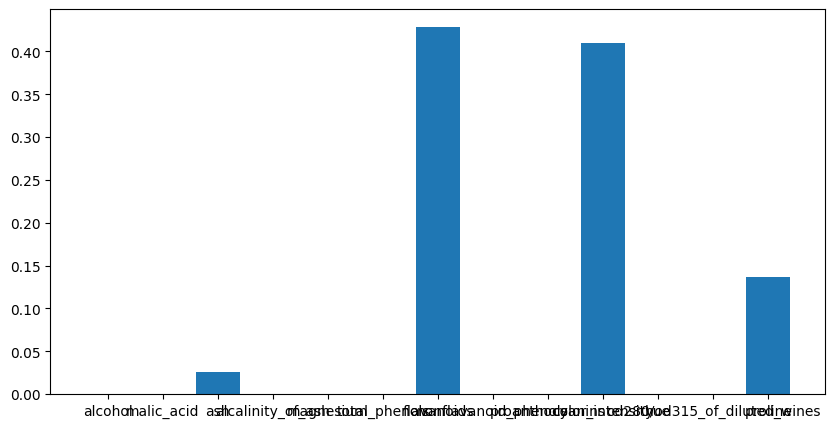

In [57]:
plt.figure(figsize=(10,5))
plt.bar(wine.feature_names, clf_dt.feature_importances_)
plt.show()

## Random Forest
https://chrisalbon.com/machine_learning/trees_and_forests/random_forest_classifier_example/




In [58]:
# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

# Set random seed
np.random.seed(0)

# Create a random forest Classifier. 
clf_rf = RandomForestClassifier(n_estimators = 20, max_depth = max_depth, criterion = 'gini', n_jobs=2, random_state=0)

# Train the Classifier to take the training input (X_train) and learn how they relate
# to the training output y_train (the species)
clf_rf = clf_rf.fit(X_train, y_train)
# Apply the Classifier we trained to the test data (X_test)
y_test_est_rf = clf_rf.predict(X_test)

In [59]:
clf_rf.predict_proba(X_test)[0:10]

array([[0.94078578, 0.05921422, 0.        ],
       [0.96316541, 0.03683459, 0.        ],
       [0.00833333, 0.25042088, 0.74124579],
       [0.91223592, 0.08776408, 0.        ],
       [0.13574421, 0.72492573, 0.13933007],
       [0.91223592, 0.08776408, 0.        ],
       [0.0196267 , 0.95825028, 0.02212302],
       [0.04615385, 0.01398925, 0.9398569 ],
       [0.0633767 , 0.92408362, 0.01253968],
       [0.19878049, 0.15399729, 0.64722222]])

In [60]:
# Create confusion matrix
pd.crosstab(y_test, y_test_est_rf, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,0,1,2
Actual Species,,,
0,19,1,0
1,0,23,1
2,0,0,15


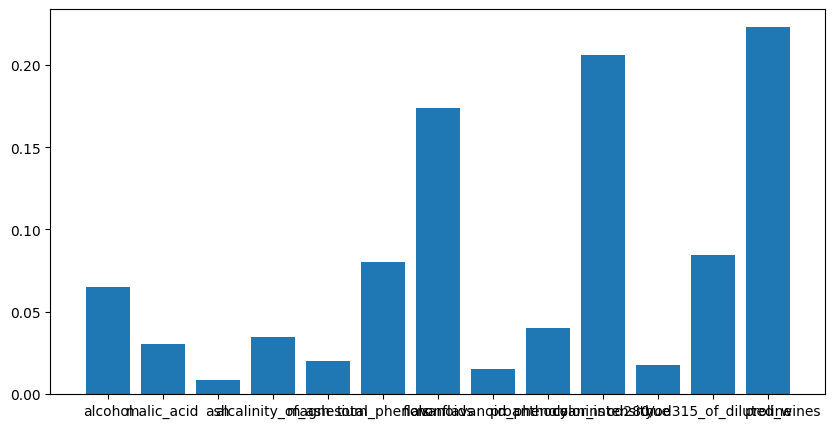

In [61]:
plt.figure(figsize=(10,5))
plt.bar(wine.feature_names, clf_rf.feature_importances_)
plt.show()

Confusion matrix, without normalization
[[19  1  0]
 [ 0 23  1]
 [ 0  0 15]]
Normalized confusion matrix
[[0.95       0.05       0.        ]
 [0.         0.95833333 0.04166667]
 [0.         0.         1.        ]]


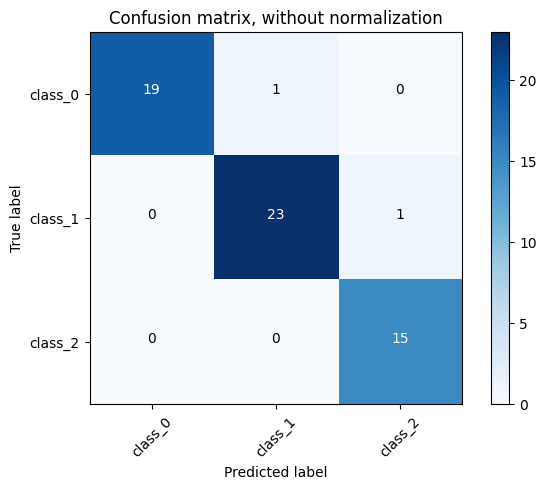

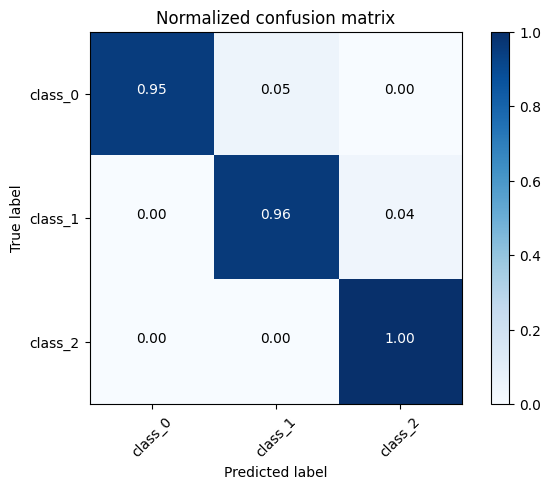

In [62]:
cm_rf =  confusion_matrix(y_test, y_test_est_rf)
plt.figure()
plot_confusion_matrix(cm_rf, classes= wine.target_names, title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cm_rf, classes= wine.target_names, normalize=True, title='Normalized confusion matrix')

# Gradient Boosting Tree

In [63]:
# Load scikit's random forest classifier library
from sklearn.ensemble import GradientBoostingClassifier

# Set random seed
np.random.seed(0)

# Create a random forest Classifier. 
clf_gbt = GradientBoostingClassifier(max_depth = max_depth)


# Train the Classifier to take the training input (X_train) and learn how they relate
# to the training output y_train (the species)
clf_gbt.fit(X_train, y_train)
# Apply the Classifier we trained to the test data (X_test)
y_test_est_gbt = clf_rf.predict(X_test)

Confusion matrix, without normalization
[[19  1  0]
 [ 0 23  1]
 [ 0  0 15]]
Normalized confusion matrix
[[0.95       0.05       0.        ]
 [0.         0.95833333 0.04166667]
 [0.         0.         1.        ]]


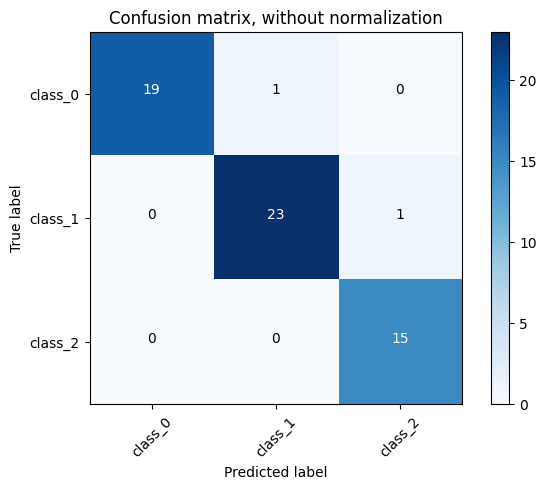

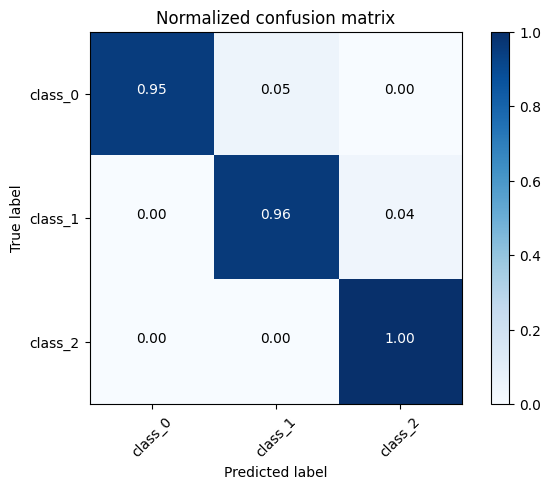

In [64]:
cm_gbt = confusion_matrix(y_test, y_test_est_gbt)
plt.figure()
plot_confusion_matrix(cm_gbt, classes= wine.target_names, title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cm_gbt, classes= wine.target_names, normalize=True, title='Normalized confusion matrix')

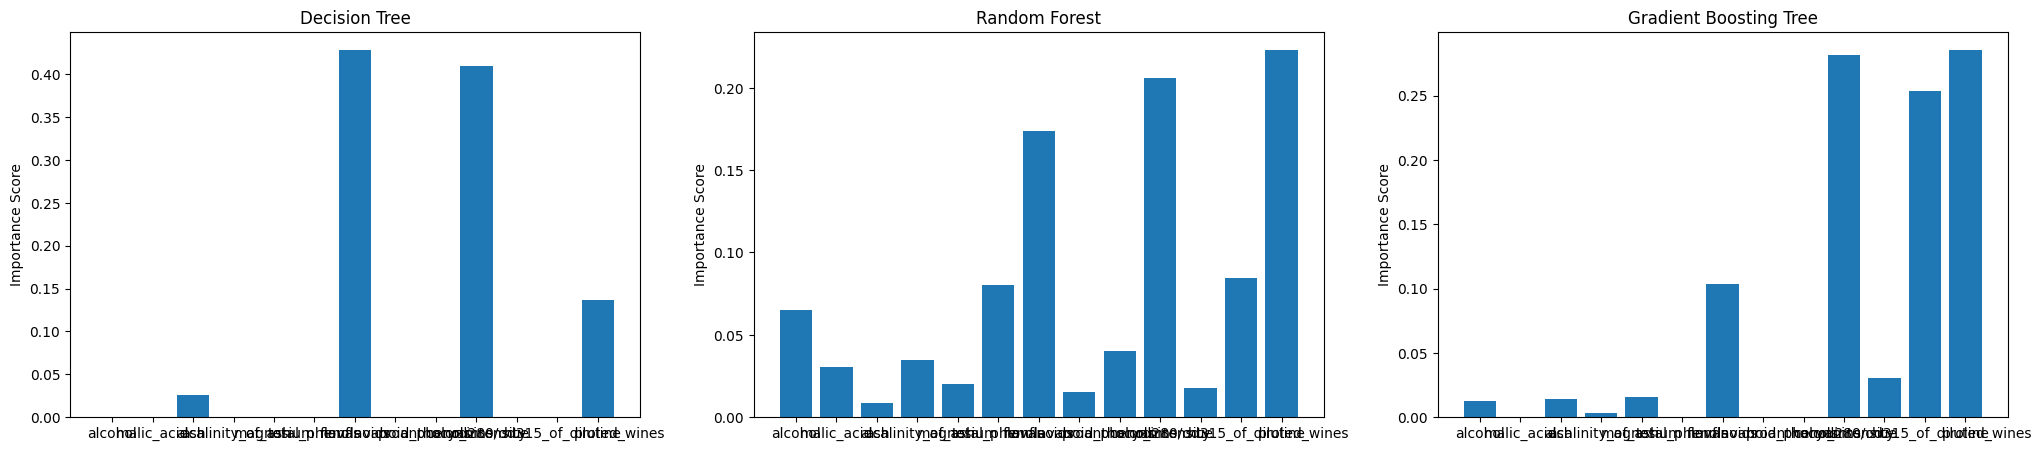

In [65]:
from pylab import *

f = plt.figure(figsize=(25, 5))
ax = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

ax.bar(wine.feature_names, clf_dt.feature_importances_)
ax.set_title('Decision Tree')
ax.set_ylabel('Importance Score')

ax2.bar(wine.feature_names, clf_rf.feature_importances_)
ax2.set_title('Random Forest')
ax2.set_ylabel('Importance Score')

ax3.bar(wine.feature_names, clf_gbt.feature_importances_)
ax3.set_title('Gradient Boosting Tree')
ax3.set_ylabel('Importance Score')

plt.show()

In [66]:
clf_gbt.feature_importances_

array([1.23584666e-02, 1.77537314e-05, 1.39450564e-02, 2.86632672e-03,
       1.59455410e-02, 4.63719150e-06, 1.03352465e-01, 1.19235333e-05,
       3.97214371e-04, 2.81470266e-01, 3.05193622e-02, 2.53884374e-01,
       2.85226612e-01])

In [68]:
df_importances = pd.DataFrame({
    'Feature': wine.feature_names,
    'Decision Tree': clf_dt.feature_importances_,
    'Random Forest': clf_rf.feature_importances_,
    'Gradient Boosting': clf_gbt.feature_importances_
})

# Set 'Feature' as the index of the DataFrame
df_importances.set_index('Feature', inplace=True)

# Print the DataFrame
print(df_importances)

                              Decision Tree  Random Forest  Gradient Boosting
Feature                                                                      
alcohol                            0.000000       0.065064           0.012358
malic_acid                         0.000000       0.030743           0.000018
ash                                0.025425       0.008470           0.013945
alcalinity_of_ash                  0.000000       0.034946           0.002866
magnesium                          0.000000       0.019937           0.015946
total_phenols                      0.000000       0.080241           0.000005
flavanoids                         0.427903       0.173944           0.103352
nonflavanoid_phenols               0.000000       0.015350           0.000012
proanthocyanins                    0.000000       0.040104           0.000397
color_intensity                    0.410289       0.206067           0.281470
hue                                0.000000       0.017922      

In [78]:
from sklearn.metrics import accuracy_score
import pickle

max_depth_values = np.arange(1,10)
results = []
print(results)
for max_depth in max_depth_values:
    clf_dt = DecisionTreeClassifier( max_depth = max_depth, criterion = 'gini', random_state=0)
    clf_rf = RandomForestClassifier(n_estimators = 20, max_depth = max_depth, criterion = 'gini', n_jobs=2, random_state=0)
    clf_gbt = GradientBoostingClassifier(max_depth = max_depth)

    clf_dt = clf_dt.fit(X_train, y_train)
    clf_rf = clf_rf.fit(X_train, y_train)
    clf_gbt = clf_gbt.fit(X_train, y_train)

    dt_pred = clf_dt.predict(X_test)
    rf_pred = clf_rf.predict(X_test)
    gbt_pred = clf_gbt.predict(X_test)

    dt_acc = accuracy_score(y_test, dt_pred)
    rf_acc = accuracy_score(y_test, rf_pred)
    gbt_acc = accuracy_score(y_test, gbt_pred)

    results.append({
        'Max Depth': max_depth,
        'Decision Tree Accuracy': dt_acc,
        'Random Forest Accuracy': rf_acc,
        'Gradient Boosting Accuracy': gbt_acc
    })

results_df = pd.DataFrame(results)
print(results_df)


    

[]
   Max Depth  Decision Tree Accuracy  Random Forest Accuracy  \
0          1                0.627119                0.915254   
1          2                0.881356                0.915254   
2          3                0.966102                0.966102   
3          4                0.966102                0.983051   
4          5                0.966102                0.983051   
5          6                0.966102                0.983051   
6          7                0.966102                0.983051   
7          8                0.966102                0.983051   
8          9                0.966102                0.983051   

   Gradient Boosting Accuracy  
0                    1.000000  
1                    0.983051  
2                    0.915254  
3                    0.915254  
4                    0.915254  
5                    0.915254  
6                    0.915254  
7                    0.915254  
8                    0.915254  


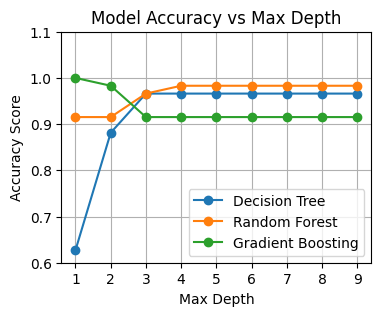

In [82]:

# Plotting the accuracy scores
plt.figure(figsize=(4, 3))
plt.plot(results_df['Max Depth'], results_df['Decision Tree Accuracy'], marker='o', label='Decision Tree')
plt.plot(results_df['Max Depth'], results_df['Random Forest Accuracy'], marker='o', label='Random Forest')
plt.plot(results_df['Max Depth'], results_df['Gradient Boosting Accuracy'], marker='o', label='Gradient Boosting')

# Adding titles and labels
plt.title('Model Accuracy vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.ylim(0.6, 1.1)  # Set y-axis limits for clarity
plt.xticks(max_depth_values)  # Set x-ticks to match max_depth values
plt.grid()
plt.legend()
plt.show()